In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')



# 1 Reading and Understanding Data



In [2]:
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
#Statistical info
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [4]:
# datatype info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
df.holiday.value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [6]:
df.mnth.value_counts()

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64

In [7]:
df.weekday.value_counts()

6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64

In [8]:
df.workingday.value_counts()

1    499
0    231
Name: workingday, dtype: int64

In [9]:
df.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [10]:
df.yr.value_counts()

0    365
1    365
Name: yr, dtype: int64

# 2 Exploratory Data Analysis

### 2.1 Dropping useless columns for better analysis

In [11]:
# Dropping instant, casual and registered as they are not needed for analysis
df = df.drop(['instant','casual','registered'], axis=1)

# Dropping dteday as they are not needed for analysis
df = df.drop(['dteday'], axis=1)
df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,2114
726,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,3095
727,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,1341
728,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,1796


### 2.2 Checking null values and missing values 
 
 

In [12]:
df.isnull()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
725,False,False,False,False,False,False,False,False,False,False,False,False
726,False,False,False,False,False,False,False,False,False,False,False,False
727,False,False,False,False,False,False,False,False,False,False,False,False
728,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
df.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

#### Observation
- The data provided does not have null and missing values

### 2.3 Finding unique values 

In [14]:
 #finding number of unique values
df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

#### Observation

- The attributes season, year, month, holiday, weekday, working and weathersit   are categorical variables and are having few values.

- The attributes temp, atemp, hum, windspeed and cnt are numeric variables.

### 2.4 Ploting Pairplot for relationship between 2 variables

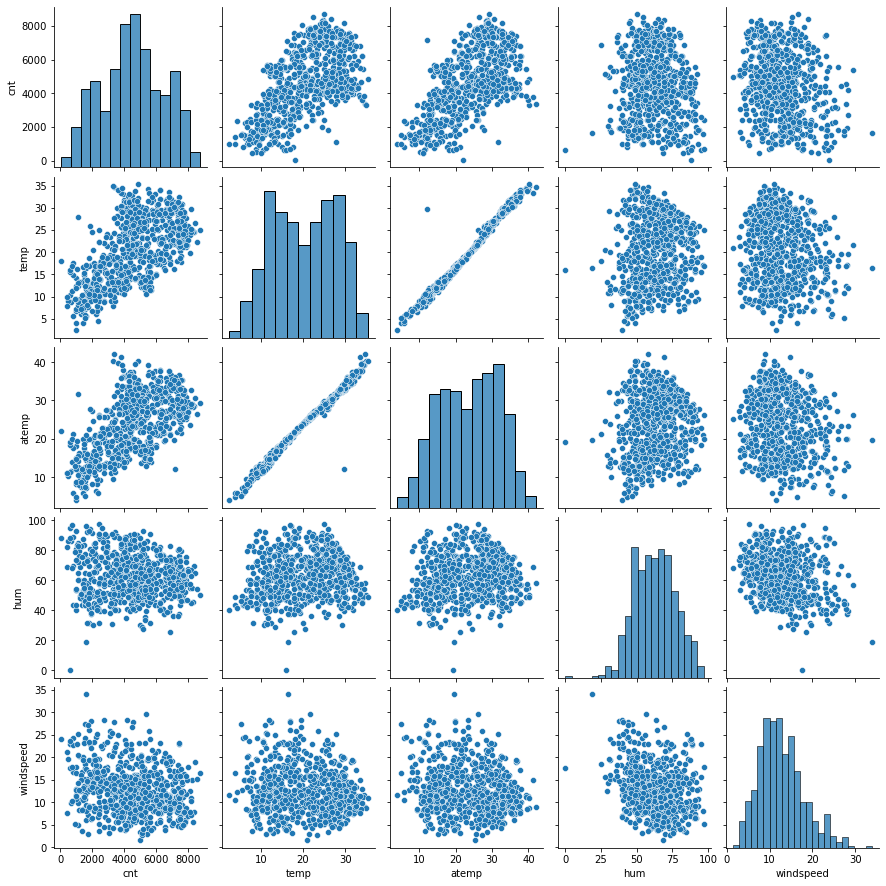

In [15]:
cols = ['cnt','temp','atemp', 'hum','windspeed']

sns.pairplot(df, vars = cols)
             
plt.show()

#### Observation 
- This correlation graphs shows linear relationship between temp, atemp and       cnt.     
- Where temp and atemp are highly correlated and forms a straight line of         positive correlation. 

### 2.5 Ploting Box plot for Categorical Variables 

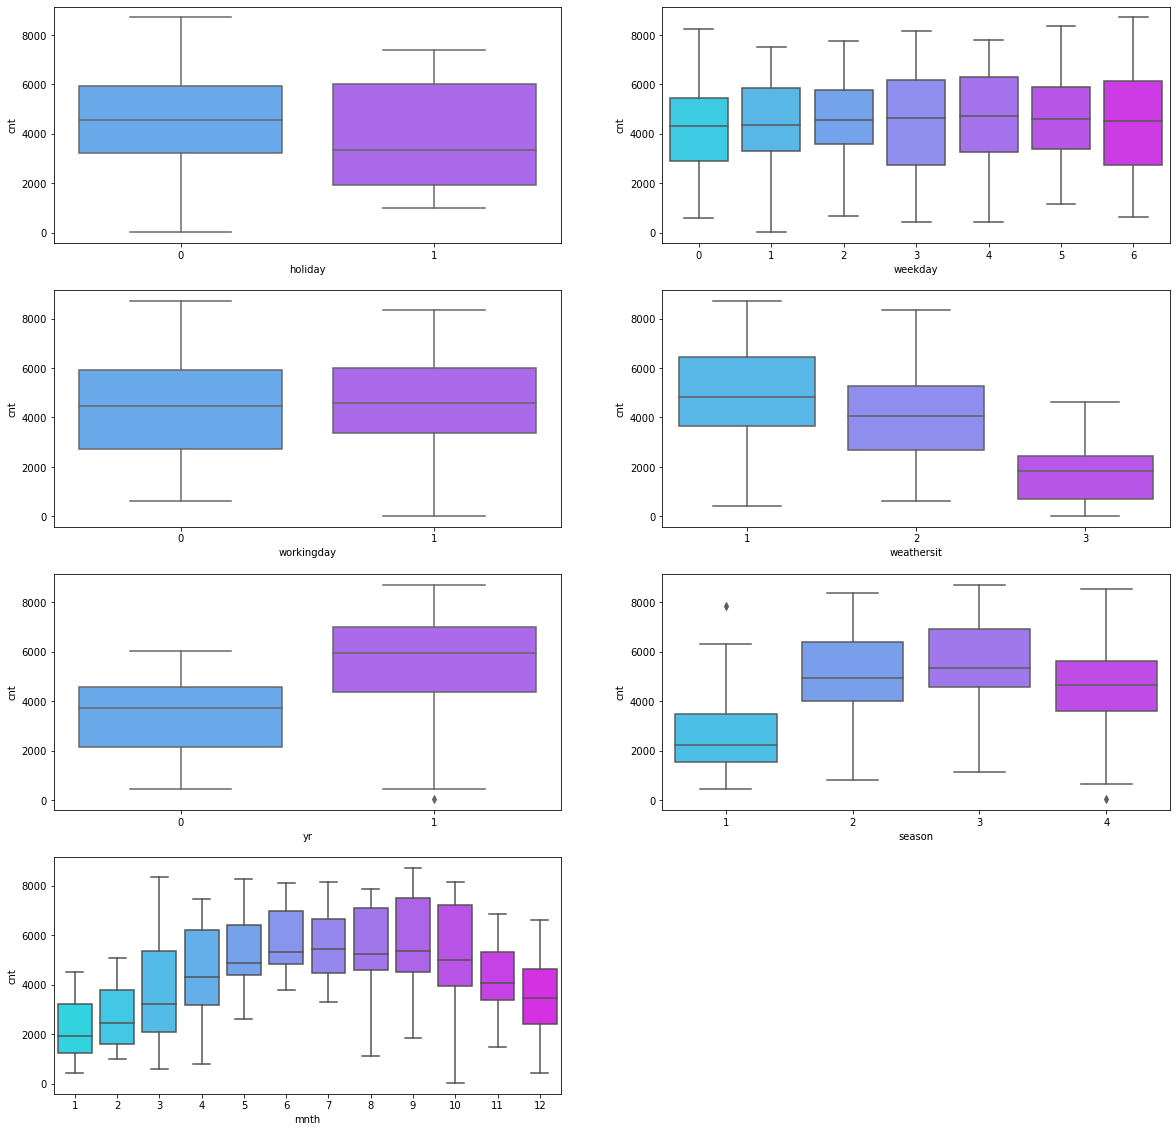

In [16]:
# Boxplot for categorical variables 
vars_cat = ['holiday','weekday','workingday','weathersit','yr','season','mnth',]
plt.figure(figsize=(20, 20))
for i in enumerate(vars_cat):
    plt.subplot(4,2,i[0]+1)
    sns.boxplot(data=df, x=i[1], y='cnt',palette='cool')
plt.show()

#### Observation
- Less demand on holiday as median is less
- Working day and week day are not giving right information for demands as they   both are showing same demand
- Weather is playing a crucial role in correlation with demands and booking 
- yr 0 has less demands and yr shows growth in demands
- april, may,june, july, august, september, and october showed more demands

### 3 Data preparation for Modelling
1) Encoding
   -binary categorial to one and zero
   -other categorical to dummy variables
2) Splitting into train and test data sets
3) Rescaling Variables 

In [17]:

#coverting categorical data in understandable form
df.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

df.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

df.mnth = df.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

df.weekday = df.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600


### 3.1 Creating Dummy variables for categorical variables 

In [18]:
# Creating dummy variables.  And dropping the first one

df = pd.get_dummies(data=df,columns=["season","mnth","weekday"],drop_first=True)
df = pd.get_dummies(data=df,columns=["weathersit"])

In [19]:
df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [20]:
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,1,0,0,0,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,1,0,1,0


### 3.2 Splitting into train and test data sets

In [21]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(df, train_size = 0.7,test_size = 0.3, random_state = 100)

### 3.3 Rescaling Variables 
- MinMax Scaling 

In [22]:
from sklearn.preprocessing import MinMaxScaler
# Apply scaler() to all the columns except the 'boolean' and 'dummy' variables
scaler = MinMaxScaler()
num_vars = ['atemp','hum','windspeed','cnt' ]

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
653,1,0,1,19.201653,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,0,0,1,0,0,1,0
576,1,0,1,29.246653,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,1,0,0,1,0
426,1,0,0,16.980847,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,1,0,0,0,0,0,0,1
728,1,0,0,10.489153,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,1,0,0,0,0,1,0
482,1,0,0,15.443347,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,1,0,0,0,0,0,0,1


### Declaring X and Y sets for building Model

In [23]:
y_train = df_train.pop('cnt')
X_train = df_train

### Building model using statsmodel, for the detailed statistics
- Using fields selected from RFE and manually dropping variables

### RFE
- Using Recursive feature elimination to pick 15 fields and using manual method   to verify and remove variables.

Also the logic to drop a variable is as follows:

- high p-value and high VIF
- High - low
- high p-value and low VIF
- low p-value and high VIF
- low p-value and low VIF

In [24]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [25]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [26]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('temp', False, 11),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 6),
 ('season_winter', True, 1),
 ('mnth_aug', False, 7),
 ('mnth_dec', True, 1),
 ('mnth_feb', False, 4),
 ('mnth_jan', True, 1),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 15),
 ('mnth_mar', False, 16),
 ('mnth_may', False, 5),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 12),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 9),
 ('weekday_sat', True, 1),
 ('weekday_sun', False, 8),
 ('weekday_thu', False, 13),
 ('weekday_tue', False, 10),
 ('weekday_wed', False, 14),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', False, 3)]

In [27]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_jan', 'mnth_jul', 'mnth_nov',
       'mnth_sept', 'weekday_sat', 'weathersit_bad', 'weathersit_good'],
      dtype='object')

In [28]:
X_train.columns[~rfe.support_]

Index(['workingday', 'temp', 'season_summer', 'mnth_aug', 'mnth_feb',
       'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_oct', 'weekday_mon',
       'weekday_sun', 'weekday_thu', 'weekday_tue', 'weekday_wed',
       'weathersit_moderate'],
      dtype='object')

In [29]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [30]:
#Function to build a model using statsmodel api - Takes the X_train for model as a parameter
def build_model(X_train):
    X_train_sm = sm.add_constant(X_train)
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

## Building Linear Model with Stats Model

### Model 1

#### VIF Check

In [31]:
import statsmodels.api as sm

# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lm = sm.OLS(y_train, X_train_lm1).fit()

# Check the parameters obtained

lm.params

const              0.307942
yr                 0.232598
holiday           -0.084117
atemp              0.446979
hum               -0.147689
windspeed         -0.169162
season_spring     -0.106986
season_winter      0.066155
mnth_dec          -0.048480
mnth_jan          -0.051525
mnth_jul          -0.067871
mnth_nov          -0.050182
mnth_sept          0.058559
weekday_sat        0.018187
weathersit_bad    -0.192180
weathersit_good    0.058230
dtype: float64

In [32]:
# Print a summary of the linear regression model obtained
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.4
Date:                Wed, 11 May 2022   Prob (F-statistic):          9.67e-187
Time:                        23:42:56   Log-Likelihood:                 508.84
No. Observations:                 510   AIC:                            -985.7
Df Residuals:                     494   BIC:                            -917.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3079      0.036     

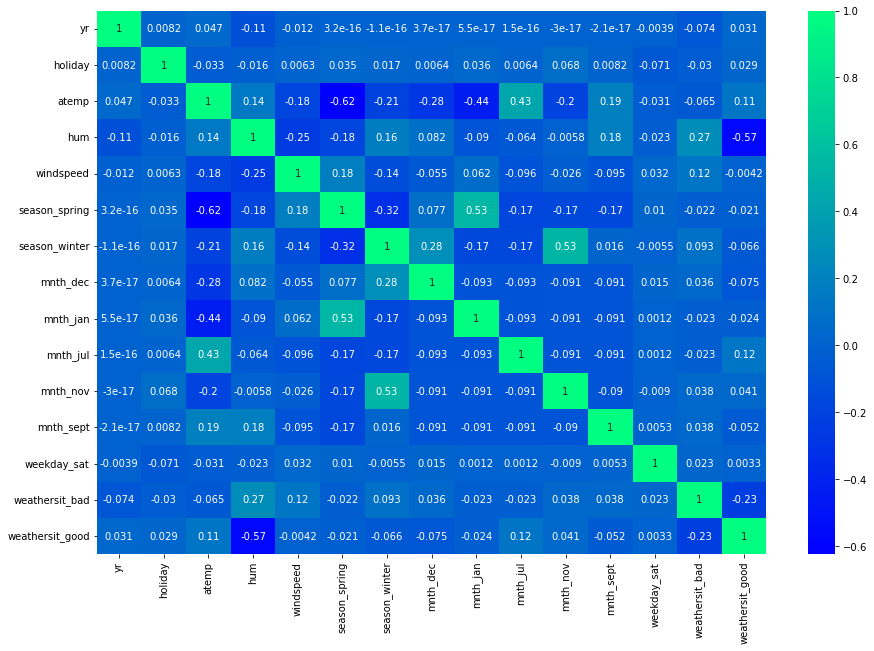

In [33]:
# Checking correlation of features selected by RFE with target column. 
# Also to check impact of different features on target.
plt.figure(figsize = (15,10))
sns.heatmap(df[X_train_rfe.columns].corr(), cmap='winter', annot=True)
plt.show()

### Model 2

- Removing the variable 'atemp' based on its High p-value & High VIF

In [34]:
X_train_new = X_train_rfe.drop(["atemp"], axis = 1)

#### VIF Check

In [35]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,5.36
3,windspeed,4.11
5,season_winter,2.73
13,weathersit_good,2.42
4,season_spring,2.35
0,yr,1.98
9,mnth_nov,1.79
7,mnth_jan,1.64
6,mnth_dec,1.46
8,mnth_jul,1.21


In [36]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

# Create a first fitted model
lm = sm.OLS(y_train, X_train_lm2).fit()

# Check the parameters obtained

lm.params

const              0.494797
yr                 0.246195
holiday           -0.082731
hum               -0.022985
windspeed         -0.210932
season_spring     -0.217871
season_winter      0.007589
mnth_dec          -0.108492
mnth_jan          -0.121338
mnth_jul           0.012665
mnth_nov          -0.097494
mnth_sept          0.079215
weekday_sat        0.018318
weathersit_bad    -0.219960
weathersit_good    0.086309
dtype: float64

In [37]:
# Print a summary of the linear regression model obtained
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     132.4
Date:                Wed, 11 May 2022   Prob (F-statistic):          3.69e-157
Time:                        23:42:57   Log-Likelihood:                 435.55
No. Observations:                 510   AIC:                            -841.1
Df Residuals:                     495   BIC:                            -777.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.4948      0.038     

### Model 3
- Removing the variable 'hum' based on its Very High 'VIF' value.
- Even though the VIF of hum is second highest, we decided to drop 'hum' and     not 'temp' based on general knowledge that temperature can be an important     factor for a business like bike rentals, and wanted to retain 'temp'.


In [38]:
X_train_new = X_train_new.drop(["hum"], axis = 1)

#### VIF Check

In [39]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.04
4,season_winter,2.52
12,weathersit_good,2.36
3,season_spring,2.33
0,yr,1.82
8,mnth_nov,1.79
6,mnth_jan,1.63
5,mnth_dec,1.46
10,weekday_sat,1.18
7,mnth_jul,1.17


In [40]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lm = sm.OLS(y_train, X_train_lm3).fit()

lm.params

const              0.475825
yr                 0.246616
holiday           -0.082852
windspeed         -0.206229
season_spring     -0.216880
season_winter      0.006931
mnth_dec          -0.108661
mnth_jan          -0.121316
mnth_jul           0.012892
mnth_nov          -0.096800
mnth_sept          0.078416
weekday_sat        0.018707
weathersit_bad    -0.222548
weathersit_good    0.089882
dtype: float64

In [41]:
# Print a summary of the linear regression model obtained
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     142.8
Date:                Wed, 11 May 2022   Prob (F-statistic):          3.50e-158
Time:                        23:42:57   Log-Likelihood:                 435.40
No. Observations:                 510   AIC:                            -842.8
Df Residuals:                     496   BIC:                            -783.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.4758      0.014     

### Model 4
- Removing the variable 'season3' based on its Very High 'VIF' value.
- Even though the VIF of season3 is second highest, we decided to drop           'season3' and not 'temp' based on general knowledge that temperature can be     an important factor for a business like bike rentals, and wanted to retain     'temp'.

#### VIF Check

In [42]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.04
4,season_winter,2.52
12,weathersit_good,2.36
3,season_spring,2.33
0,yr,1.82
8,mnth_nov,1.79
6,mnth_jan,1.63
5,mnth_dec,1.46
10,weekday_sat,1.18
7,mnth_jul,1.17


In [43]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fitted model
lm = sm.OLS(y_train, X_train_lm4).fit()

# Check the parameters obtained

lm.params

const              0.475825
yr                 0.246616
holiday           -0.082852
windspeed         -0.206229
season_spring     -0.216880
season_winter      0.006931
mnth_dec          -0.108661
mnth_jan          -0.121316
mnth_jul           0.012892
mnth_nov          -0.096800
mnth_sept          0.078416
weekday_sat        0.018707
weathersit_bad    -0.222548
weathersit_good    0.089882
dtype: float64

In [44]:
# Print a summary of the linear regression model obtained
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     142.8
Date:                Wed, 11 May 2022   Prob (F-statistic):          3.50e-158
Time:                        23:42:57   Log-Likelihood:                 435.40
No. Observations:                 510   AIC:                            -842.8
Df Residuals:                     496   BIC:                            -783.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.4758      0.014     

### Model 5

- Removing the variable 'mnth_10' based on its Very High p-value.

#### VIF Check

In [45]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.04
4,season_winter,2.52
12,weathersit_good,2.36
3,season_spring,2.33
0,yr,1.82
8,mnth_nov,1.79
6,mnth_jan,1.63
5,mnth_dec,1.46
10,weekday_sat,1.18
7,mnth_jul,1.17


In [46]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new)

# Create a first fitted model
lm = sm.OLS(y_train, X_train_lm5).fit()
# Check the parameters obtained

lm.params

const              0.475825
yr                 0.246616
holiday           -0.082852
windspeed         -0.206229
season_spring     -0.216880
season_winter      0.006931
mnth_dec          -0.108661
mnth_jan          -0.121316
mnth_jul           0.012892
mnth_nov          -0.096800
mnth_sept          0.078416
weekday_sat        0.018707
weathersit_bad    -0.222548
weathersit_good    0.089882
dtype: float64

In [47]:
# Print a summary of the linear regression model obtained
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     142.8
Date:                Wed, 11 May 2022   Prob (F-statistic):          3.50e-158
Time:                        23:42:57   Log-Likelihood:                 435.40
No. Observations:                 510   AIC:                            -842.8
Df Residuals:                     496   BIC:                            -783.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.4758      0.014     

In [48]:
# Print rsquared and rsquared_adj from model

print(lm.rsquared_adj)
print(lm.rsquared)

0.7835832173152567
0.7891105614702698


### Model interpretation
A) Model coeff values

const               0.4758     
yr                  0.2466      
holiday            -0.0829      
windspeed          -0.2062      
season_spring      -0.2169      
season_winter       0.0069      
mnth_dec           -0.1087      
mnth_jan           -0.1213      
mnth_jul            0.0129     
mnth_nov           -0.0968      
mnth_sept           0.0784      
weekday_sat         0.0187      
weathersit_bad     -0.2225      
weathersit_good     0.0899  

### ASSUMPTIONS
#### 1 Error terms are normally distributed with mean zero
#### Residual Analysis of the train data
- So, now to check if the error terms are also normally distributed (which is     infact, one of the major assumptions of linear regression), let us plot the     histogram of the error terms and see what it looks like.

Text(0.5, 0, 'Errors')

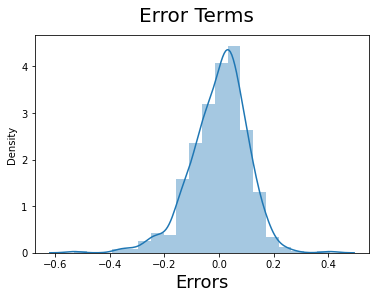

In [49]:
y_train_cnt=lm.predict(X_train_lm5)
res = y_train-y_train_cnt
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Insights
- From the above histogram, we could see that the Residuals are normally         distributed. Hence our assumption for Linear Regression is valid.

### There is a linear relationship between X and Y

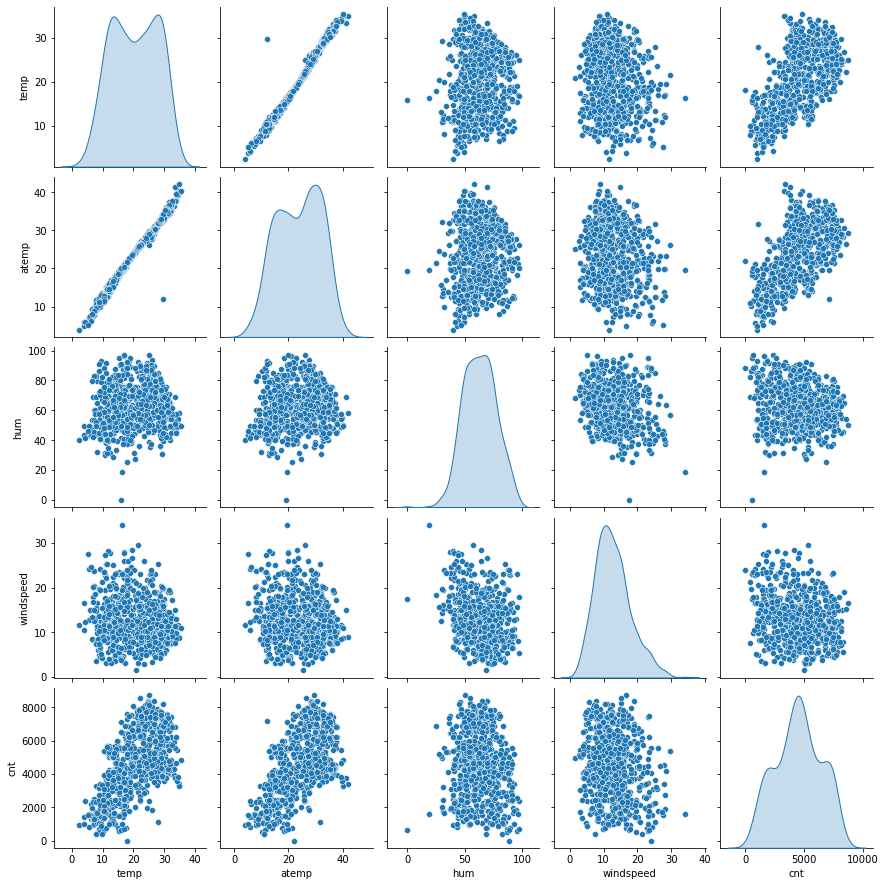

In [50]:
df=df[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(df, diag_kind='kde')
plt.show()

### Insight
- Using the pair plot, we could see there is a linear relation between temp and   atemp variable with the predictor ‘cnt’.


## There is No Multicollinearity between the predictor variables

In [51]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.04
4,season_winter,2.52
12,weathersit_good,2.36
3,season_spring,2.33
0,yr,1.82
8,mnth_nov,1.79
6,mnth_jan,1.63
5,mnth_dec,1.46
10,weekday_sat,1.18
7,mnth_jul,1.17


### Insight
- From the VIF calculation we could find that there is no multicollinearity       existing between the predictor variables, as all the values are within         permissible range of below 5

## MAKING PREDICTION USING FINAL MODEL
- Now that we have fitted the model and checked the assumptions, it's time to     go ahead and make predictions using the final model (lr6)

- Applying the scaling on the test sets

In [ ]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['atemp','hum','windspeed','cnt' ]

df_test[num_vars] = scaler.transform(df_test[num_vars])


In [53]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,0,...,0,1,0,0,0,0,0,0,0,1
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,0,1,...,0,0,0,0,0,0,1,0,1,0
299,0,0,1,19.270000,22.85230,81.2917,13.250121,2659,0,0,...,0,0,0,0,1,0,0,0,0,1
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,0,0,...,0,0,0,0,0,0,1,0,1,0
152,0,0,1,29.315000,32.19710,30.5000,19.583229,4968,0,1,...,0,0,0,0,1,0,0,0,1,0


In [54]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,20.815737,24.255828,61.961883,12.600130,4546.981735,0.255708,0.264840,...,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.027397,0.652968,0.319635
std,0.500722,0.188034,0.459904,7.689600,8.299641,14.456669,4.984858,1898.633630,0.437258,0.442259,...,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.163612,0.477117,0.467403
min,0.000000,0.000000,0.000000,3.957390,4.941955,25.416700,1.500244,441.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,14.093750,17.085500,51.166700,9.021282,3303.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,20.807500,24.873150,60.916700,12.167200,4579.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,27.401653,31.155725,72.192050,15.395629,5869.500000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,34.815847,41.318550,97.250000,27.999836,8395.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [55]:
y_test = df_test.pop('cnt')
X_test = df_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   yr                   219 non-null    int64  
 1   holiday              219 non-null    int64  
 2   workingday           219 non-null    int64  
 3   temp                 219 non-null    float64
 4   atemp                219 non-null    float64
 5   hum                  219 non-null    float64
 6   windspeed            219 non-null    float64
 7   season_spring        219 non-null    uint8  
 8   season_summer        219 non-null    uint8  
 9   season_winter        219 non-null    uint8  
 10  mnth_aug             219 non-null    uint8  
 11  mnth_dec             219 non-null    uint8  
 12  mnth_feb             219 non-null    uint8  
 13  mnth_jan             219 non-null    uint8  
 14  mnth_jul             219 non-null    uint8  
 15  mnth_jun             219 non-null    ui

In [56]:
#Selecting the variables that were part of final model.
col1=X_train_new.columns
X_test=X_test[col1]
# Adding constant variable to test dataframe
X_test_lm6 = sm.add_constant(X_test)
X_test_lm6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   const            219 non-null    float64
 1   yr               219 non-null    int64  
 2   holiday          219 non-null    int64  
 3   windspeed        219 non-null    float64
 4   season_spring    219 non-null    uint8  
 5   season_winter    219 non-null    uint8  
 6   mnth_dec         219 non-null    uint8  
 7   mnth_jan         219 non-null    uint8  
 8   mnth_jul         219 non-null    uint8  
 9   mnth_nov         219 non-null    uint8  
 10  mnth_sept        219 non-null    uint8  
 11  weekday_sat      219 non-null    uint8  
 12  weathersit_bad   219 non-null    uint8  
 13  weathersit_good  219 non-null    uint8  
dtypes: float64(2), int64(2), uint8(10)
memory usage: 10.7 KB


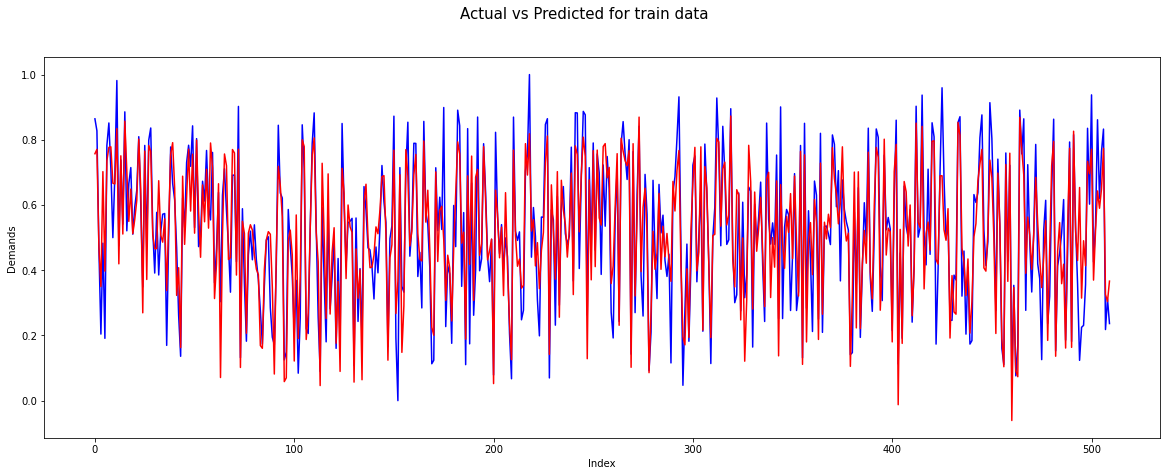

In [57]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.figure(figsize=(20,7))
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_cnt, color="red")
plt.suptitle('Actual vs Predicted for train data', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

## FINAL REPORT

- holiday (-0.0951)
- weathersit_good (0.0817)
- mnth_jul ( -0.068)
- mnth_sept (0.0601)
- season_winter (0.039)